In [1]:
import pandas as pd
from sklearn import datasets
iris_data = datasets.load_iris().data
iris_target = datasets.load_iris().target
#help(pd.DataFrame)
iris_data = pd.DataFrame(iris_data,columns=["花萼长","花萼宽","花瓣长","花瓣宽"])
iris_data["分类"] = iris_target
iris_data.head()

,花萼长,花萼宽,花瓣长,花瓣宽,分类
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
iris_data.describe()

,花萼长,花萼宽,花瓣长,花瓣宽,分类
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


/Users/huqianghui/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/huqianghui/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


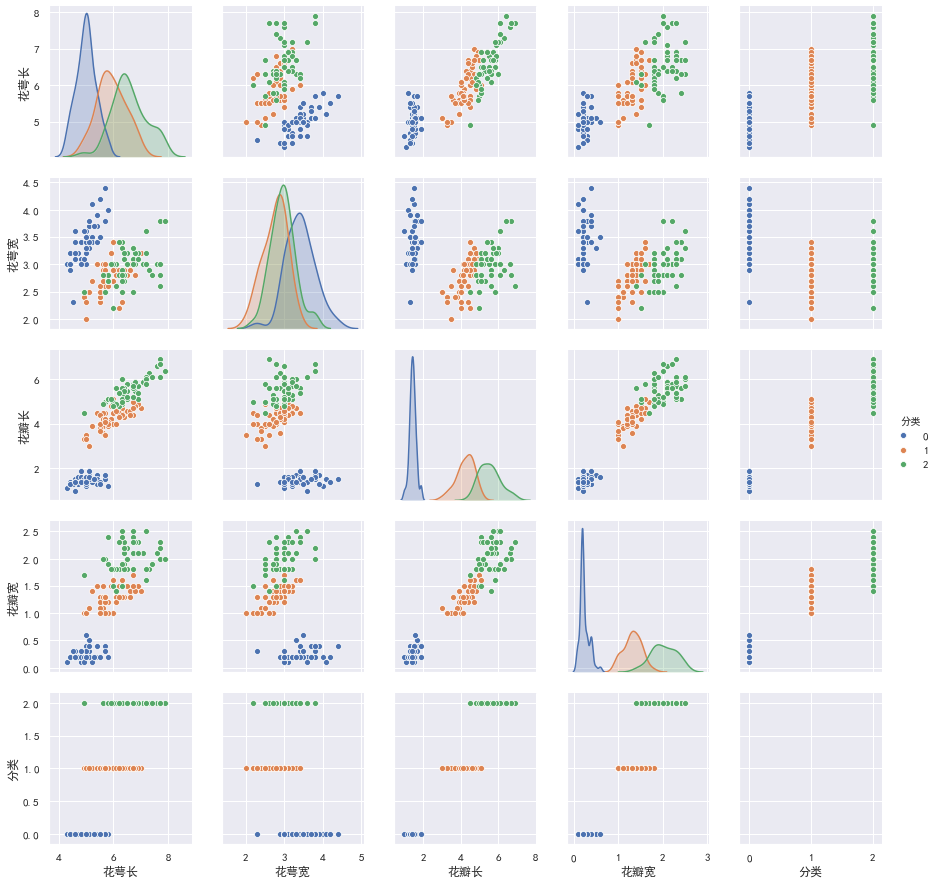

In [3]:
import matplotlib
from matplotlib.font_manager import FontProperties 

myfont=FontProperties(fname=r'/Users/huqianghui/Downloads/SourceHanSansSC-Bold.otf')
matplotlib.rcParams['font.family']='sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['Source Han Sans CN']

plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sb.set(font='SimHei')  # 解决Seaborn中文显示问题

sb.pairplot(iris_data,hue="分类")

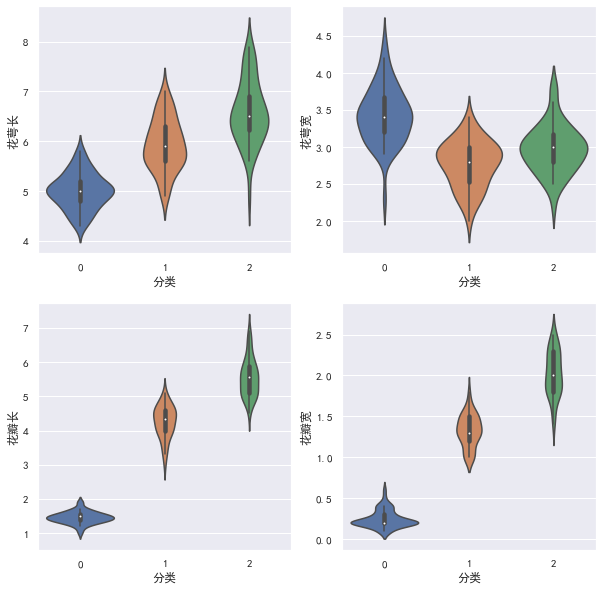

In [4]:
plt.figure(figsize=(10,10))
for index,column in enumerate(iris_data.columns):
    if column=="分类":
        continue;
    plt.subplot(2,2,index+1)
    sb.violinplot(x="分类",y=column,data=iris_data)

In [11]:
from sklearn import tree
import graphviz

clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris_data.iloc[:, 0:-1], iris_data["分类"])

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=iris_data.columns[:-1], # 特征名称
                                class_names=['山鸢尾', '蓝旗鸢尾','青龙鸢尾'], # 目标变量的类别名
                                filled=True, rounded=True,
                                special_characters=True)

graph = graphviz.Source(dot_data)
graph.render('iris.dot', directory='./', view=True)

'./iris.dot.pdf'